# <a name="0">Analytics vidhya - Jobathon - June 2022</a>

In this notebook, we are performing initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Glimpse of dataset</a>
3. <a href="#3">Univariate analysis</a>
4. <a href="#4">Bivariate analysis</a>
5. <a href="#5">Machine Learning</a>

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting pandas options for good visualization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.max_info_columns', 30)

# seaborn style for chart visualization
sns.set_style("whitegrid")

In [3]:
# reading data
training_data = pd.read_csv("../data/train_wn75k28.csv")
test_data = pd.read_csv("../data/test_Wf7sxXF.csv")

## 2. <a name="2">Glimpse of dataset</a>
(<a href="#0">Go to top</a>)

We will look at number of rows, columns and some simple statistics of the dataset.

### Top 5 rows

In [4]:
# top 5 rows - train
training_data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.00,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.00,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.00,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.00,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


### Number of rows and columns

In [5]:
# shape of data
print("Shape of training data :", training_data.shape)
print("Shape of test data :", test_data.shape)

Shape of training data : (39161, 19)
Shape of test data : (13184, 18)


### Column Names

In [6]:
# columns names
print(training_data.columns)

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')


### Column types

In [7]:
# data types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

### Unique values

In [8]:
# unique values
training_data.nunique()

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

### Missing % summary

In [9]:
# missing values
training_data.isnull().sum()/len(training_data)

id                     0.00
created_at             0.00
campaign_var_1         0.00
campaign_var_2         0.00
products_purchased     0.53
signup_date            0.39
user_activity_var_1    0.00
user_activity_var_2    0.00
user_activity_var_3    0.00
user_activity_var_4    0.00
user_activity_var_5    0.00
user_activity_var_6    0.00
user_activity_var_7    0.00
user_activity_var_8    0.00
user_activity_var_9    0.00
user_activity_var_10   0.00
user_activity_var_11   0.00
user_activity_var_12   0.00
buy                    0.00
dtype: float64

## 3. <a name="3">Univariate analysis</a>
(<a href="#0">Go to top</a>)

Let's explore each column independently. At first, we will explore target variable.

### Buy

In [10]:
# freq analysis - count
print(training_data['buy'].value_counts())

# freq analysis - %
print(training_data['buy'].value_counts(normalize = True))

0    37163
1     1998
Name: buy, dtype: int64
0   0.95
1   0.05
Name: buy, dtype: float64


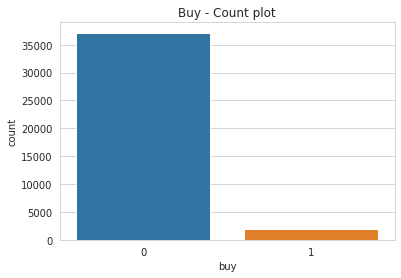

In [11]:
# count plot
plt.title("Buy - Count plot")
sns.countplot(x = 'buy', data = training_data);

> Buy is having unbalanced distributed with 0 = 95% and 1 = 5% distribution. It seems like most people don't buy at all.

### Categorical features

In [12]:
# categorical columns
cat_cols = ['campaign_var_1', 'campaign_var_2', 'products_purchased',
            'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3', 
            'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6', 
            'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
            'user_activity_var_11', 'user_activity_var_12']

In [13]:
# freq analysis
for col in cat_cols:
    print("Freq analysis : " + col)
    print(pd.concat([
        training_data[col].value_counts(normalize = False),
        training_data[col].value_counts(normalize = True)], axis = 1))
    print("")

Freq analysis : campaign_var_1
    campaign_var_1  campaign_var_1
6             4061            0.10
5             4060            0.10
4             4018            0.10
3             3784            0.10
7             3756            0.10
2             3486            0.09
8             3407            0.09
9             2866            0.07
10            2392            0.06
11            1873            0.05
1             1593            0.04
12            1455            0.04
13            1059            0.03
14             714            0.02
15             456            0.01
16             181            0.00

Freq analysis : campaign_var_2
    campaign_var_2  campaign_var_2
6             5744            0.15
7             5472            0.14
5             5250            0.13
8             4690            0.12
4             4213            0.11
9             3537            0.09
3             2883            0.07
10            2298            0.06
2             1788         

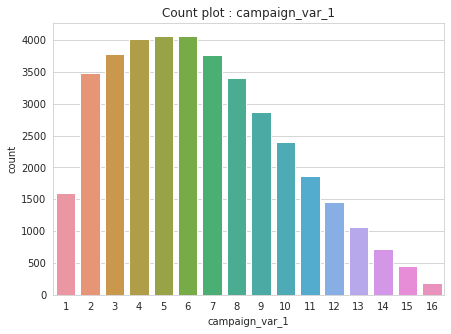

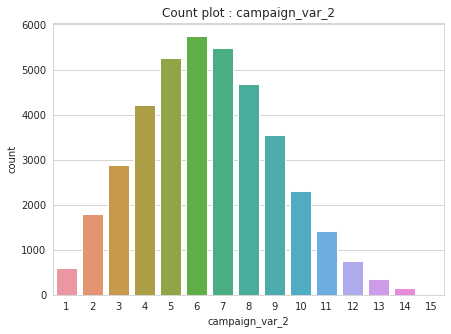

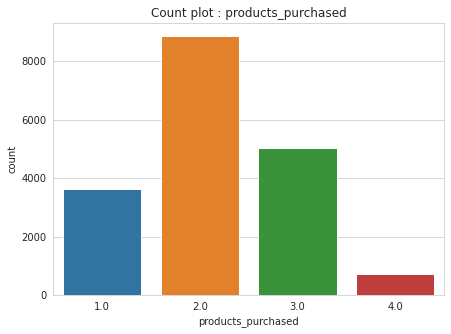

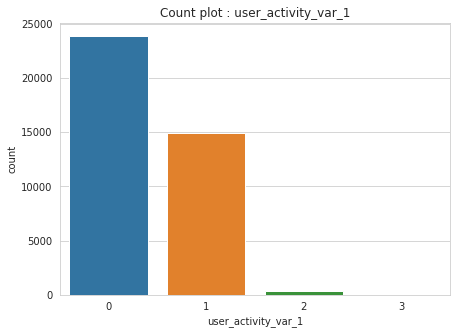

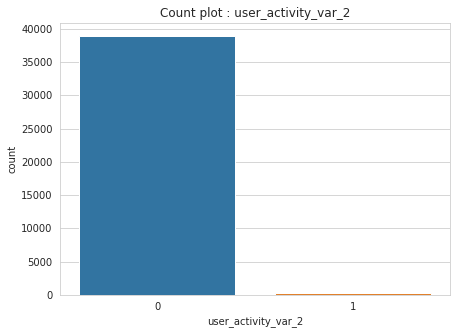

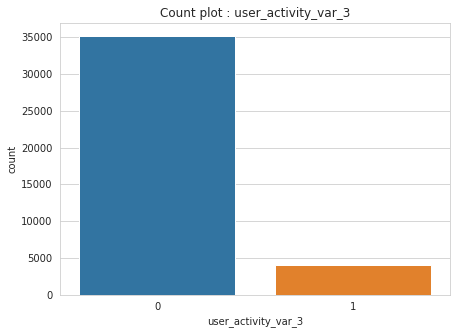

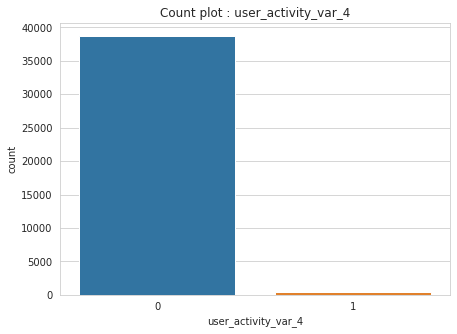

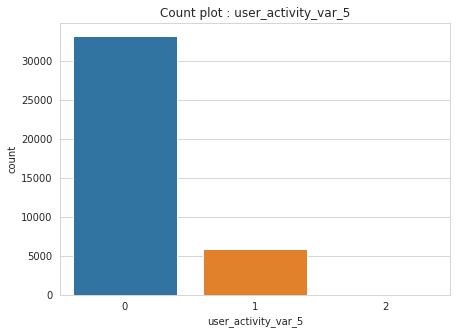

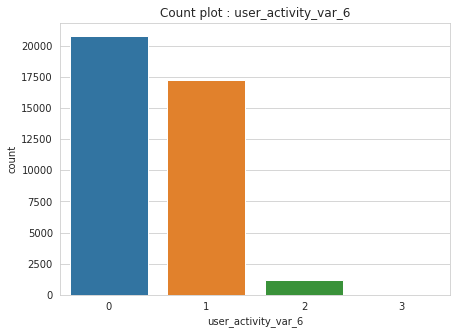

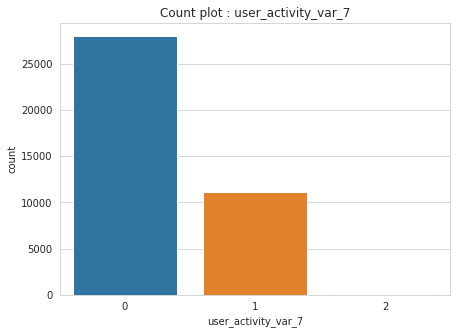

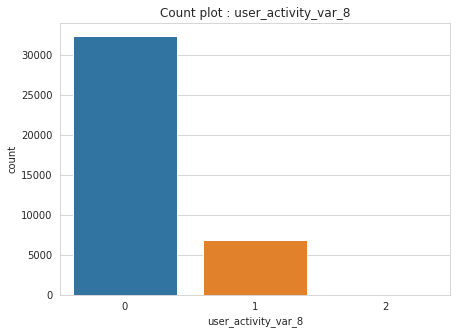

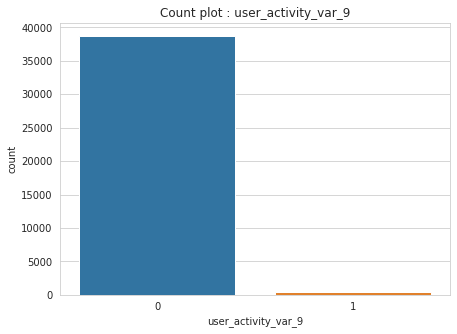

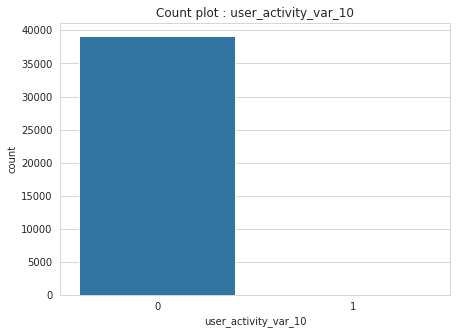

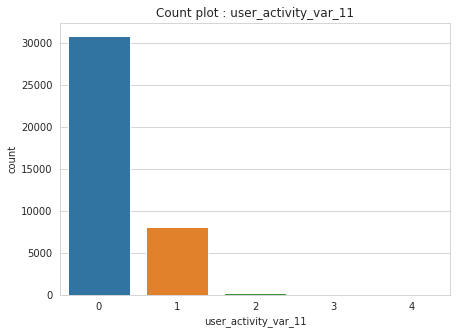

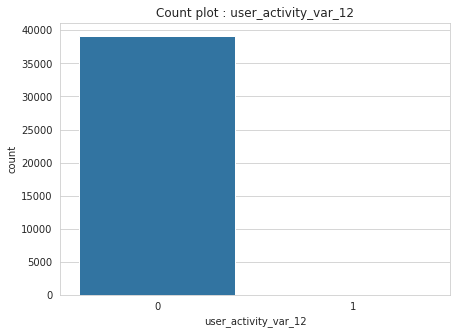

In [14]:
# count plot
for col in cat_cols:
    plt.figure(figsize = (7,5))
    plt.title("Count plot : " + col)
    sns.countplot(x = col, data = training_data)
    plt.show()

## 4. <a name="4">Bivariate analysis</a>
(<a href="#0">Go to top</a>)

Let's explore relationship of each column with target column.

/tmp/ipykernel_25267/2733158060.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (7,5))


<Figure size 504x360 with 0 Axes>

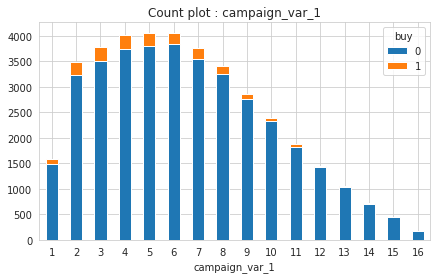

<Figure size 504x360 with 0 Axes>

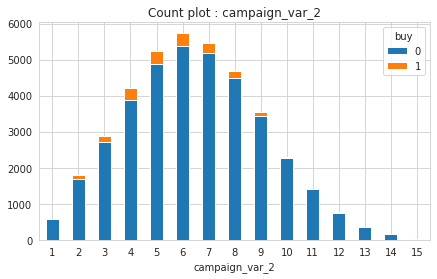

<Figure size 504x360 with 0 Axes>

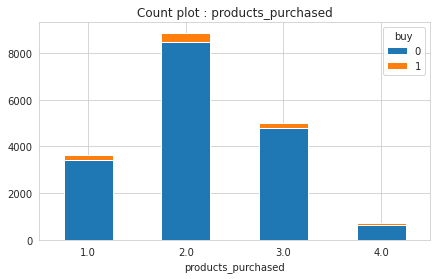

<Figure size 504x360 with 0 Axes>

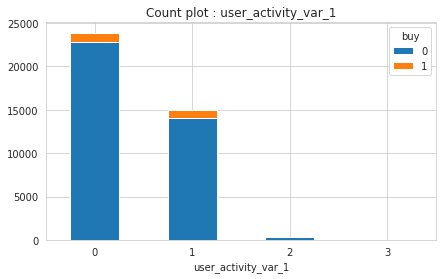

<Figure size 504x360 with 0 Axes>

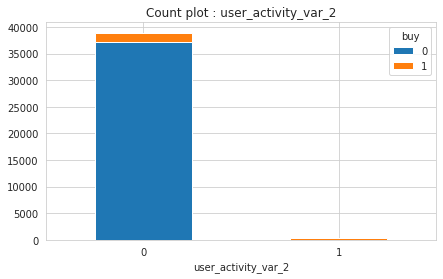

<Figure size 504x360 with 0 Axes>

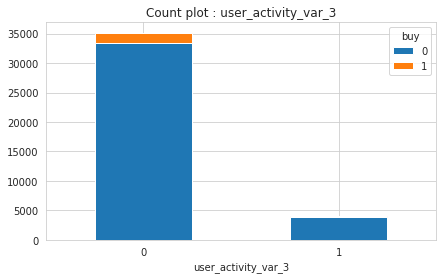

<Figure size 504x360 with 0 Axes>

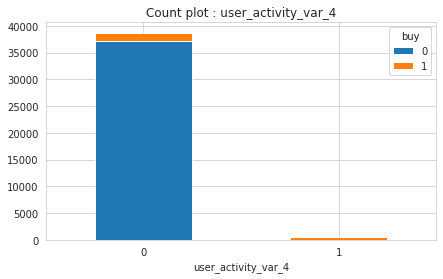

<Figure size 504x360 with 0 Axes>

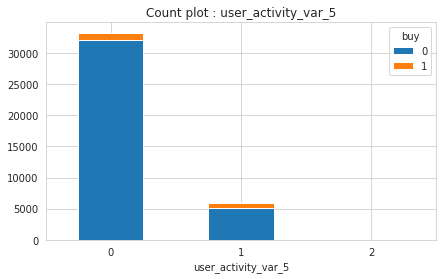

<Figure size 504x360 with 0 Axes>

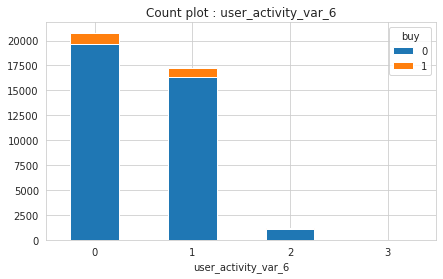

<Figure size 504x360 with 0 Axes>

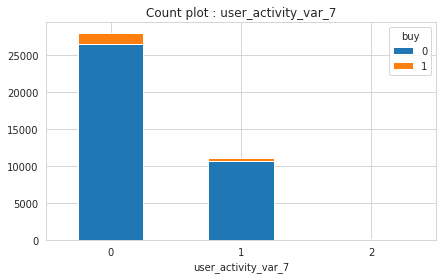

<Figure size 504x360 with 0 Axes>

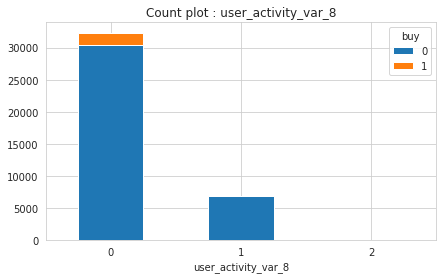

<Figure size 504x360 with 0 Axes>

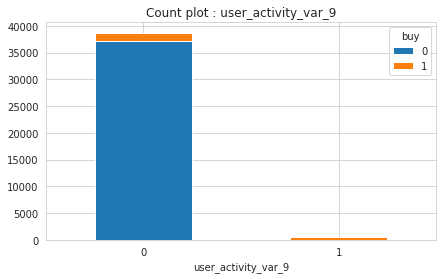

<Figure size 504x360 with 0 Axes>

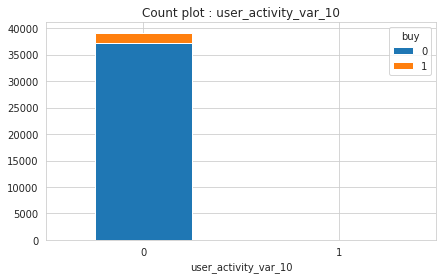

<Figure size 504x360 with 0 Axes>

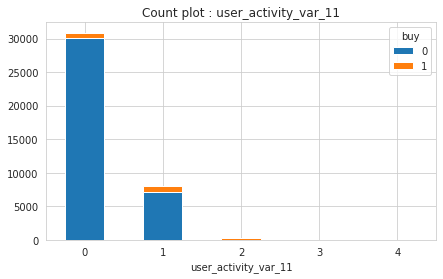

<Figure size 504x360 with 0 Axes>

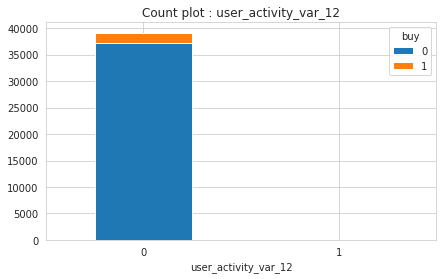

In [15]:
# bi-variate relationship between target and categorical variable
for col in cat_cols:
    plt.figure(figsize = (7,5))
    CrosstabResult=pd.crosstab(index=training_data[col],columns=training_data['buy'])
    CrosstabResult.plot.bar(figsize=(7,4), rot=0, stacked = True, title = "Count plot : " + col);

In [16]:
# checking significance of each feature with target col
cat_cols_fin = ['campaign_var_1','campaign_var_2','user_activity_var_1','user_activity_var_2',
                'user_activity_var_3','user_activity_var_4','user_activity_var_5',
                'user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9',
                'user_activity_var_10','user_activity_var_11','user_activity_var_12']

X = training_data[cat_cols_fin].values
y = training_data['buy'].values

from sklearn.feature_selection import chi2

chi2, pvalue = chi2(X,y)

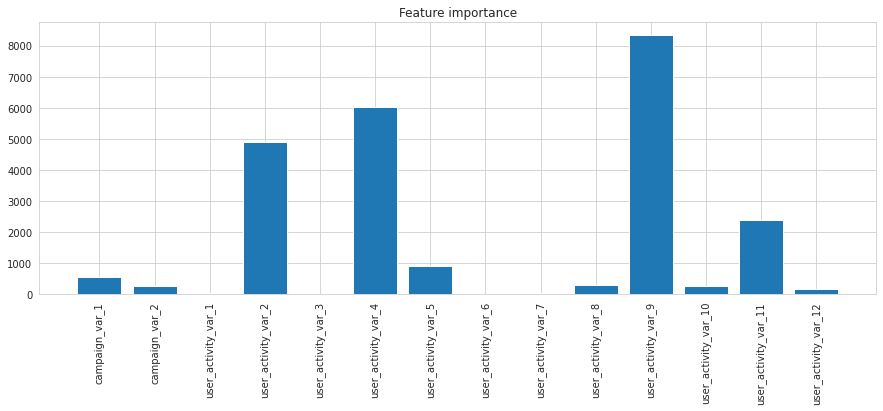

In [17]:
plt.figure(figsize = (15,5))
plt.title("Feature importance")
plt.bar(cat_cols_fin, chi2);
plt.xticks(rotation = 90)
plt.show();

In [18]:
# feature importance summary
feature_imp = pd.DataFrame()
feature_imp["Columns"] = cat_cols_fin
feature_imp["chi2"] = chi2
feature_imp["pvalue"] = pvalue
feature_imp["Sig"] = np.where(feature_imp["pvalue"] < 0.05, "Sig", "Not Sig")
feature_imp.sort_values(by = ["chi2"], ascending = False)

,Columns,chi2,pvalue,Sig
10,user_activity_var_9,"8,332.84",0.00,Sig
5,user_activity_var_4,"6,031.05",0.00,Sig
3,user_activity_var_2,"4,891.83",0.00,Sig
12,user_activity_var_11,"2,392.32",0.00,Sig
6,user_activity_var_5,910.07,0.00,Sig
0,campaign_var_1,550.54,0.00,Sig
9,user_activity_var_8,306.75,0.00,Sig
11,user_activity_var_10,279.00,0.00,Sig
1,campaign_var_2,265.87,0.00,Sig
13,user_activity_var_12,180.80,0.00,Sig


## 5. <a name="5">Machine Learning</a>
(<a href="#0">Go to top</a>)

Let's start exploring some machine learning models which will be best suited for this data.

### Finding best model using automl

In [19]:
# auto ml
from autogluon.tabular import TabularPredictor

# dropping id column from training data
training_data = training_data.drop(['id', 'products_purchased', 'signup_date'], axis = 1)

save_path = '../models/agModels-predictClass-itr3'  # specifies folder to store trained models
metric = 'f1'
target = 'buy'
predictor = TabularPredictor(label=target, eval_metric=metric, path=save_path).fit(training_data)

/home/studio-lab-user/.conda/envs/av-jobathon-june-2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Beginning AutoGluon training ...
AutoGluon will save models to "../models/agModels-predictClass-itr3/"
AutoGluon Version:  0.4.2
Python Version:     3.9.13
Operating System:   Linux
Train Data Rows:    39161
Train Data Columns: 15
Label Column: buy
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the 

In [20]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2       0.69           0.09     82.86                    0.01               2.43            2       True         14
1        NeuralNetTorch       0.68           0.03     52.25                    0.03              52.25            1       True         12
2       NeuralNetFastAI       0.67           0.05     25.56                    0.05              25.56            1       True         10
3              CatBoost       0.66           0.01      2.62                    0.01               2.62            1       True          7
4            LightGBMXT       0.66           0.01      1.59                    0.01               1.59            1       True          3
5         LightGBMLarge       0.66           0.02      1.66                    0.02               1.66        

/home/studio-lab-user/.conda/envs/av-jobathon-june-2022/lib/python3.9/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [21]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('int', [])                  : 8 | ['campaign_var_1', 'campaign_var_2', 'user_activity_var_1', 'user_activity_var_5', 'user_activity_var_6', ...]
('int', ['bool'])            : 6 | ['user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_9', 'user_activity_var_10', ...]
('int', ['datetime_as_int']) : 4 | ['created_at', 'created_at.month', 'created_at.day', 'created_at.dayofweek']


### Feature importance

In [22]:
# feature importance
feature_imp = predictor.feature_importance(training_data)
feature_imp

Computing feature importance via permutation shuffling for 15 features using 5000 rows with 5 shuffle sets...
	18.94s	= Expected runtime (3.79s per shuffle set)
	12.34s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
user_activity_var_9,0.18,0.02,0.00,5,0.23,0.13
user_activity_var_11,0.14,0.03,0.00,5,0.19,0.09
user_activity_var_4,0.13,0.02,0.00,5,0.18,0.08
user_activity_var_2,0.11,0.03,0.00,5,0.16,0.06
user_activity_var_5,0.03,0.01,0.00,5,0.05,0.02
user_activity_var_6,0.02,0.01,0.00,5,0.04,0.00
campaign_var_2,0.02,0.01,0.00,5,0.03,0.01
user_activity_var_8,0.02,0.01,0.00,5,0.04,0.00
user_activity_var_1,0.02,0.01,0.00,5,0.04,0.00
created_at,0.02,0.01,0.00,5,0.03,0.01


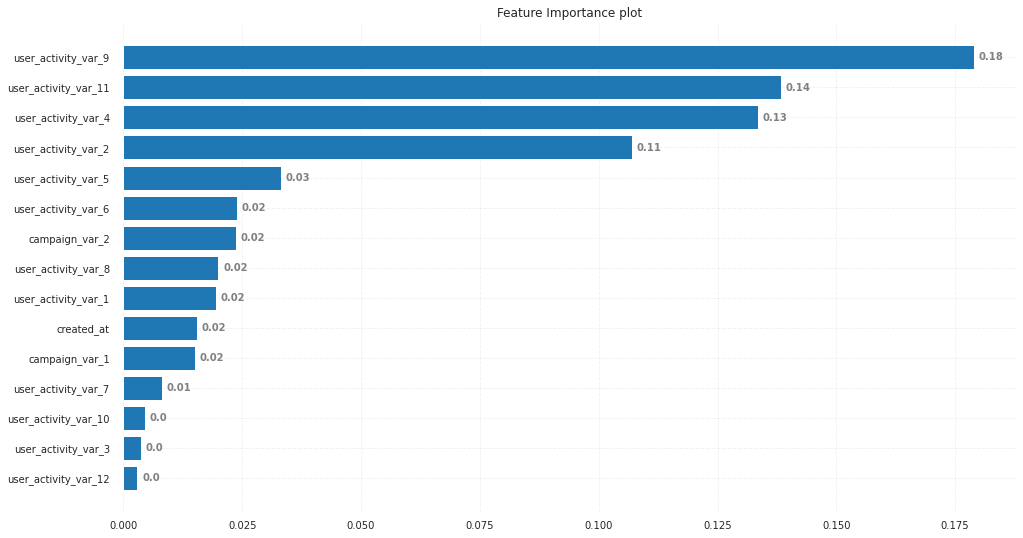

In [23]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.set_title("Feature Importance plot")
ax.barh(feature_imp.index, feature_imp.importance.values)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.001, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

### Making prediction

In [24]:
# making prediction on test data
test_pred = predictor.predict(test_data)

# creating submission file
submission_df = test_data.copy()
submission_df["buy"] = test_pred
submission_df = submission_df[["id", "buy"]]

# saving submission file
submission_df.to_csv("../output/output_weighted_ensemble_v3.csv", index = False)